# Experimenting with Normalization and Standarization

In [1]:
import pandas as pd

In [62]:
# I create a list of random numbers
#import random
#random_state=123
#a_list = random.sample(range(9, 100), 8)
#a_list

In [63]:
# Here is another list I'll try
#random_state=123
#a_list = random.sample(range(999, 11000), 10)
#a_list

In [94]:
# Here is my own list - looking at a more skewed dataset
a_list = [5640, 6890, 6821, 7777, 992, 7983, 10012, 4723, 7617, 9046]

In [95]:
# Convert back into a dataframe with column names
a_list_df = pd.DataFrame(a_list,  columns=['Original'])

In [96]:
a_list_df

,Original
0,5640
1,6890
2,6821
3,7777
4,992
5,7983
6,10012
7,4723
8,7617
9,9046


In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()

In [99]:
# Transform and fit the data
a_list_scaled = scaler.fit_transform(a_list_df)

In [100]:
a_list_scaled

array([[-0.46190458],
       [ 0.05821138],
       [ 0.02950098],
       [ 0.42728566],
       [-2.39590375],
       [ 0.51300077],
       [ 1.35725299],
       [-0.84346164],
       [ 0.36071082],
       [ 0.95530738]])

In [101]:
# Looking at the numbers they are reduced significantly. 

In [102]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
scaler = MinMaxScaler()

In [104]:
# Transform and fit the data
a_list_normalized = scaler.fit_transform(a_list_df)

In [105]:
a_list_normalized

array([[0.51529933],
       [0.65388027],
       [0.6462306 ],
       [0.75221729],
       [0.        ],
       [0.77505543],
       [1.        ],
       [0.41363636],
       [0.73447894],
       [0.89290466]])

In [106]:
# All of these are between 0 and 1

In [107]:
import numpy as np

In [108]:
# Going to try log transformations too
loglist = np.log(a_list)

In [109]:
a_list_log = (loglist-np.mean(loglist))/np.sqrt(np.var(loglist))

In [110]:
a_list_log

array([-0.07784072,  0.23984478,  0.22387219,  0.43202296, -2.83581564,
        0.47351141,  0.83290666, -0.35942778,  0.39903347,  0.67189267])

In [111]:
a_list_df["Log"] = a_list_log

In [112]:
a_list_df["Normalized"] = a_list_normalized

In [113]:
a_list_df["Scaled"] = a_list_scaled

In [114]:
a_list_df

,Original,Log,Normalized,Scaled
0,5640,-0.077841,0.515299,-0.461905
1,6890,0.239845,0.653880,0.058211
2,6821,0.223872,0.646231,0.029501
3,7777,0.432023,0.752217,0.427286
4,992,-2.835816,0.000000,-2.395904
5,7983,0.473511,0.775055,0.513001
6,10012,0.832907,1.000000,1.357253
7,4723,-0.359428,0.413636,-0.843462
8,7617,0.399033,0.734479,0.360711
9,9046,0.671893,0.892905,0.955307


In [115]:
a_list_df.describe()

,Original,Log,Normalized,Scaled
count,10.000000,1.000000e+01,10.000000,1.000000e+01
mean,6750.100000,8.104628e-16,0.638370,-1.665335e-16
std,2533.311423,1.054093e+00,0.280855,1.054093e+00
min,992.000000,-2.835816e+00,0.000000,-2.395904e+00
25%,5935.250000,-2.412491e-03,0.548032,-3.390532e-01
50%,7253.500000,3.194391e-01,0.694180,2.094611e-01
75%,7931.500000,4.631393e-01,0.769346,4.915720e-01
max,10012.000000,8.329067e-01,1.000000,1.357253e+00


In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Scaled')

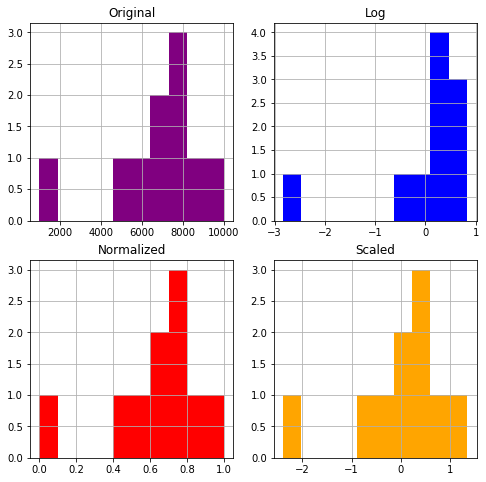

In [123]:
# I just want to look at a couple of these again AFTER the transformation.
new_figure = plt.figure(figsize=(8,8))

ax1 = plt.subplot(2, 2, 1)
a_list_df.Original.hist(ax=ax1, color='purple')
ax1.set_title("Original")

ax2 = plt.subplot(2, 2, 2)
a_list_df.Log.hist(ax=ax2, color='blue')
ax2.set_title('Log')

ax3 = plt.subplot(2, 2, 3)
a_list_df.Normalized.hist(ax=ax3, color='red')
ax3.set_title("Normalized")

ax4 = plt.subplot(2, 2, 4)
a_list_df.Scaled.hist(ax=ax4, color='orange')
ax4.set_title('Scaled')

In [118]:
# The basic graph shapes look the same except for Log Transformed. All with different scales.

In [119]:
import seaborn as sns

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline

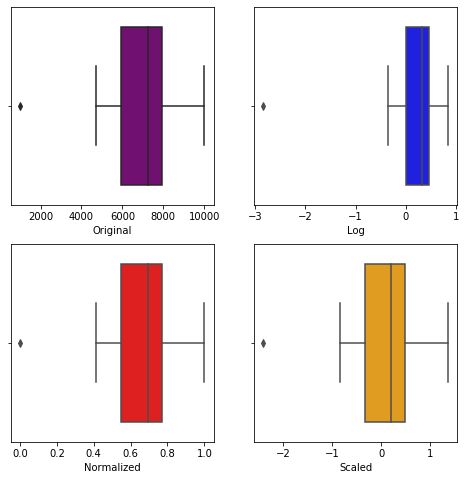

In [126]:
new_figure = plt.figure(figsize=(8,8))
plt.title('Box Plot of Feature Scaling')

ax1 = plt.subplot(2, 2, 1)
sns.boxplot(x='Original', data=a_list_df, color='purple')

ax2 = plt.subplot(2, 2, 2)
sns.boxplot(x='Log', data=a_list_df, color='blue')

ax3 = plt.subplot(2, 2, 3)
sns.boxplot(x='Normalized', data=a_list_df, color='red')

ax4 = plt.subplot(2, 2, 4)
sns.boxplot(x='Scaled', data=a_list_df, color='orange')

plt.show()

In [93]:
# Normalized is between 0 and 1.
# Standard Scaler is between -1 and 1.
# Log transformed changed the shape and outliers.